In [1]:
import requests
import json
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re as re
from fugitiveData import Fugitive
import pprint
import networkx as nx

In [2]:
i = 1
hasContent = True
empty = []
while hasContent:
    response = requests.get('https://api.fbi.gov/wanted/v1/list', params={
        'page': i
    }).json()['items']

    if pd.DataFrame(response).empty:
        hasContent = False
        continue
    else:
        for item in response:
            empty.append(item)
        i += 1

data = pd.DataFrame(empty)

In [3]:
fugitives = []
for i in range(0, data.shape[0]):
    fugitives.append(Fugitive(data.iloc[i, :]))

df = pd.DataFrame([x.to_dict() for x in fugitives])

In [4]:
df.head(10)

,Details,Remarks,NCIC,Scars & Marks,Images,Person Classification,Height Min,Race,Age Range,Aliases,...,Legal Names,Possible Countries,Sex,Place of Birth,Dates of Birth Used,Hair Raw,Hair,Coordinates,Field Offices,@ID
0,None,None,W031095905,Bright has a scar on his right finger.,<fugitiveData.FImages object at 0x10c3c4250>,Main,71.0,black,None,McRay M. Bright,...,None,None,male,Illinois,"[May 28, 1987]",Black,black,None,[chicago],https://api.fbi.gov/@wanted-person/54d95b077b5...
1,The Federal Bureau of Investigation's Albuquer...,None,None,None,<fugitiveData.FImages object at 0x1075e44d0>,Main,NaN,None,None,None,...,None,None,None,None,None,None,None,None,"[albuquerque, dallas]",https://api.fbi.gov/@wanted-person/40f9a069785...
2,"On January 27, 2002, at approximately 11:50 p....",None,None,None,<fugitiveData.FImages object at 0x10c8164d0>,Main,NaN,None,None,None,...,None,None,None,None,None,None,None,None,[denver],https://api.fbi.gov/@wanted-person/f23b652a5da...
3,"On Saturday, June 25, 2022, the Life Choices b...",None,None,None,<fugitiveData.FImages object at 0x10c8381d0>,Main,NaN,None,None,None,...,None,None,None,None,None,None,None,None,[denver],https://api.fbi.gov/@wanted-person/1501448d52d...
4,"In the early morning hours of January 17, 2023...",None,None,None,<fugitiveData.FImages object at 0x10c83a150>,Main,NaN,None,None,None,...,None,None,None,None,None,None,None,None,[charlotte],https://api.fbi.gov/@wanted-person/775553e7d13...
5,The FBI's Seattle Field Office is assisting th...,The photographs shown are more than a year old...,None,None,<fugitiveData.FImages object at 0x10c848090>,Main,NaN,None,None,Brxsan John,...,None,None,male,Hawaii,"[October 17, 2014]",Black,black,None,[seattle],https://api.fbi.gov/@wanted-person/e2c3d91ad7c...
6,"On August 1, 2019, at approximately 10:00 a.m....",None,None,None,<fugitiveData.FImages object at 0x10c849c90>,Main,NaN,None,None,None,...,None,None,None,None,None,None,None,None,[philadelphia],https://api.fbi.gov/@wanted-person/1b8ccc01f8d...
7,Jesus de la Cruz was last seen on September 28...,"De la Cruz has a scar above his left eye, birt...",None,None,<fugitiveData.FImages object at 0x10c84c990>,Main,54.0,hispanic,None,None,...,None,None,male,None,None,Brown,brown,None,None,https://api.fbi.gov/@wanted-person/b166d627e11...
8,None,"Livshits has ties to Russia, Estonia, Finland,...",None,None,<fugitiveData.FImages object at 0x10c84aa10>,Main,NaN,white,None,Boris Levitan,...,None,None,male,"Leningrad, Russia","[May 9, 1970]",Black / Bald,black,None,[newyork],https://api.fbi.gov/@wanted-person/b953c05b852...
9,"Susan Gail Carter was last seen in Beckley, We...",None,None,None,<fugitiveData.FImages object at 0x10c84cc90>,Main,66.0,white,None,Susan Gail Carter Webb,...,None,None,female,None,"[March 8, 1959]",Blonde,blond,None,[pittsburgh],https://api.fbi.gov/@wanted-person/33df244225e...


In [23]:
fugitive_graph = nx.from_pandas_edgelist(df, source="URL", target="@ID") # useless, playing with nx for now

In [8]:
type(fugitive_graph)

networkx.classes.graph.Graph

In [12]:
nx.number_of_nodes(fugitive_graph)

1940

In [15]:
fugitive_graph.nodes

NodeView(('https://www.fbi.gov/wanted/known-bank-robbers/mcray-briscoe-bright', 'https://api.fbi.gov/@wanted-person/54d95b077b5146669ea3b3cc3ff2892f', 'https://www.fbi.gov/wanted/seeking-info/stolen-artwork', 'https://api.fbi.gov/@wanted-person/40f9a0697852489a85c3e75a61fb761d', 'https://www.fbi.gov/wanted/seeking-info/triple-homicide-investigation----colorado-', 'https://api.fbi.gov/@wanted-person/f23b652a5da343b39f0c8f3a87ad1552', 'https://www.fbi.gov/wanted/seeking-info/life-choices-arson-and-vandalism', 'https://api.fbi.gov/@wanted-person/1501448d52d848fb8ed82d78307bf193', 'https://www.fbi.gov/wanted/seeking-info/electrical-substation-shooting', 'https://api.fbi.gov/@wanted-person/775553e7d13243879545de56e2c00ecd', 'https://www.fbi.gov/wanted/kidnap/breadson-john', 'https://api.fbi.gov/@wanted-person/e2c3d91ad7c046a18d5cf5b877afc5e0', 'https://www.fbi.gov/wanted/seeking-info/attempted-armored-car-robbery', 'https://api.fbi.gov/@wanted-person/1b8ccc01f8db4aa9af6e04e7089e3d3e', 'http

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

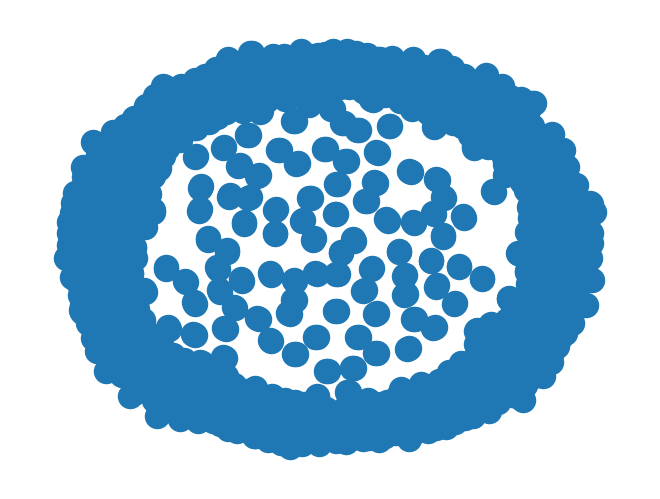

In [20]:
nx.draw(fugitive_graph)